In [23]:
import numpy as np
from scipy.integrate import quad
import lhapdf

# Load the PDF set
pdf = lhapdf.mkPDF("NNPDF31_nnlo_as_0118", 0)

# Constants
m_Z = 91.1876 
Gamma_Z = 2.4952  
sin2th_w = 0.23126  # sin^2(theta_W)
alpha = 1 / 137  
Nc = 3  
s = (13e3) ** 2  

quark_couplings = [
     (1, -0.1007, 0.0224, -0.4776), # down
    (2, 0.2013, -0.0449, 0.4551), # up
     (3, -0.1007, 0.0224, -0.4776), # strange
     (4, 0.2013, -0.0449, 0.4551), # charm
]  

# Define the function to be integrated
def f_s(x, tau, flavor, Q2):
    tau_x = tau / x
    term1 = (1 / x) * pdf.xfxQ2(flavor, x, Q2) * pdf.xfxQ2(-flavor, tau_x, Q2)
    term2 = pdf.xfxQ2(flavor, tau_x, Q2) * (1 / x) * pdf.xfxQ2(-flavor, x, Q2)
    return term1 + term2

def integrate_f_s(tau, flavor, Q2):
    result, error = quad(f_s, tau, 1, args=(tau, flavor, Q2))
    return result

# Define the terms for the summation
def term_1(Q2, e_f):
    return e_f**2 / (2 * Q2**2)
    
def term_2(Q2, e_f, g):
    return (((1 - (m_Z**2 / Q2)) / ((Q2 - m_Z**2)**2 + m_Z**2 * Gamma_Z**2)) *
            (1 - 4 * sin2th_w) / (4 * sin2th_w * (1 - sin2th_w)) * e_f * g)
            
def term_3(Q2, e_f, g):
    return (1 / ((Q2 - m_Z**2)**2 + m_Z**2 * Gamma_Z**2) * 
            (1 + (1 - 4 * sin2th_w)**2) / (32 * sin2th_w**2 * (1 - sin2th_w)**2)) * g**2

def summation_terms(Q2, e_f, g):
    return term_1(Q2, e_f) + term_2(Q2, e_f, g) + term_3(Q2, e_f, g)

# Compute the differential cross-section
def d_sigma_dQ2(Q2, quark_couplings):
    tau = Q2 / s
    d_sigma = 0

    for flavor, e_f, g_fR, g_fL in quark_couplings:
        integral = integrate_f_s(tau, flavor, Q2)
        
        sum_terms_L = summation_terms(Q2, e_f, g_fL)
        sum_terms_R = summation_terms(Q2, e_f, g_fR)
        
        d_sigma += 4 * np.pi * alpha**2 / (3 * Nc) * (sum_terms_L + sum_terms_R) * integral

    result = 0.38 * 1e9 * d_sigma  # Conversion from GeV^-2 to Pb
    return result

# Integrate d_sigma_dQ2 with special handling for the peak region
def integrate_d_sigma(quark_couplings, Q2_min=50**2, Q2_max=13000**2):
    peak_min, peak_max = 80**2, 100**2
    
    # Integrate the region excluding the peak
    result1, error1 = quad(d_sigma_dQ2, Q2_min, peak_min, args=(quark_couplings))
    result2, error2 = quad(d_sigma_dQ2, peak_max, Q2_max, args=(quark_couplings))
    
    # Integrate the peak region with higher precision
    result_peak, error_peak = quad(d_sigma_dQ2, peak_min, peak_max, args=(quark_couplings), epsabs=1e-12, epsrel=1e-12)
    
    total_result = result1 + result_peak + result2
    total_error = error1 + error_peak + error2
    
    return total_result, total_error

# Calculate the integrated cross-section
integrated_d_sigma_value, integrated_d_sigma_error = integrate_d_sigma(quark_couplings)
print(f"Sigma value: {integrated_d_sigma_value}pb, with error estimate {integrated_d_sigma_error}")

LHAPDF 6.5.4 loading /home/ahmed/miniconda3/envs/env1/share/LHAPDF/NNPDF31_nnlo_as_0118/NNPDF31_nnlo_as_0118_0000.dat
NNPDF31_nnlo_as_0118 PDF set, member #0, version 1; LHAPDF ID = 303600


/tmp/ipykernel_6183/4147792273.py:31: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result, error = quad(f_s, tau, 1, args=(tau, flavor, Q2))
/tmp/ipykernel_6183/4147792273.py:70: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Per

Sigma value: 1854.0805931024045pb, with error estimate 0.021223697297695708


/tmp/ipykernel_6183/4147792273.py:74: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result_peak, error_peak = quad(d_sigma_dQ2, peak_min, peak_max, args=(quark_couplings), epsabs=1e-12, epsrel=1e-12)


/tmp/ipykernel_6183/4129793258.py:31: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result, error = quad(f_s, tau, 1, args=(tau, flavor, Q2))


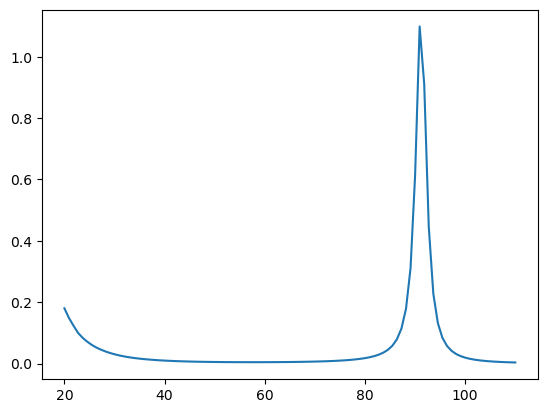

In [17]:
import matplotlib.pyplot as plt
Qval = np.linspace(20,110,100)
value= [d_sigma_dQ2(Q**2, quark_couplings) for Q in Qval]
plt.plot(Qval, value)
plt.show()